In [2]:
from scipy import stats
import math
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Single Source of Truth

I took my Single Source of Truth, named **ssot**, and saved it in the same folder as the original dataset CSVs:

**ssot.to_pickle('./ssot.pkl')**

To open a dataset saved with **.to_pickle()** in a new notebook, you use terminal (in the new notebook, of course) to get to the right directory and then type:

**variable_name = pd.read_pickle('./ssot.pkl')**

In [41]:
cd CSVs

/Users/cherishkim/Code/school_projects/DS11/Assignments/DS/NPS Project/SA/CSVs


In [42]:
ssot = pd.read_pickle('./ssot.pkl')
ssot.head()

,Year,Week,Track,Location,Schedule Pace Rating,Overall Satisfaction Rating,Net Promoter Status
0,2016,Week 1,NaN,Los Angeles,8,6,Detractor
1,2016,Week 1,NaN,Los Angeles,8,8,Passive
2,2016,Week 1,NaN,Los Angeles,8,8,Passive
3,2016,Week 1,NaN,Los Angeles,8,8,Passive
4,2016,Week 1,NaN,Los Angeles,10,8,Passive


I dropped rows that had #ERROR written where a score should have been (in the 5th and 6th columns). **Why?**

* They prevented me from casting the scores as integers, rather than as strings.
* Without an actual score to work with, those data points were useless. I couldn't even say they were passives, because to be passives, they would have needed a score.

My NPS calculation may therefore differ a little bit from yours if you didn't drop these rows.

# NPS Calculation

The formula for Net Promoter Score is as follows:

**((# of promoters) - (# of detractors)) / (# of total responses)) * 100**

In [47]:
promo = len(ssot[(ssot['Net Promoter Status']=='Promoter')])
detract = len(ssot[(ssot['Net Promoter Status']=='Detractor')])
total = len(ssot)
nps = str(((promo - detract)/total) * 100)
print("NPS Calculation: " + nps)

NPS Calculation: 36.25563293732077


# Question Time!

## (Thanks, Kash!) Did percentage of promoters increase or decrease from 2016 to 2017?

First, let's find the percentage of promoters from each year. Percentage is calculated simply:

**(# of promoters)/(# of total responses)**

In [58]:
promo16 = len(ssot[(ssot['Net Promoter Status']=='Promoter') & (ssot['Year']=='2016')])
total16 = len(ssot[(ssot['Year']=='2016')])
promo16_penny = str((promo16/total16) * 100)
promo17 = len(ssot[(ssot['Net Promoter Status']=='Promoter') & (ssot['Year']=='2017')])
total17 = len(ssot[(ssot['Year']=='2017')])
promo17_penny = str((promo17/total17) * 100)
print(str(promo16) + " out of " + str(total16) + \
      " respondents in 2016 were promoters, coming to " + str(promo16_penny) + "%. " + \
      str(promo17) + " out of " + str(total17) + \
      " respondents in 2017 were promoters, coming to " + str(promo17_penny) + \
      "%. That's quite the increase!")

397 out of 991 respondents in 2016 were promoters, coming to 40.06054490413724%. 760 out of 1450 respondents in 2017 were promoters, coming to 52.41379310344828%. That's quite the increase!


# ADD SOME KIND OF VISUAL HERE. IT DOESN'T EVEN HAVE TO BE PRETTY.

In [120]:
# space space space

## What was the average Schedule Pace Rating score for promoters, passives, and detractors?

Let's find the averages! We can use **.describe()**, whose purpose in life is to tell us the count, mean, median, and standard deviation of a dataframe.

In [121]:
promo_only = ssot[(ssot['Net Promoter Status'] == 'Promoter')]
promo_only.describe()

,Schedule Pace Rating,Overall Satisfaction Rating
count,1157.000000,1157.000000
mean,8.225583,9.656007
std,2.381831,0.475244
min,0.000000,9.000000
25%,6.000000,9.000000
50%,10.000000,10.000000
75%,10.000000,10.000000
max,10.000000,10.000000


In [122]:
pass_only = ssot[(ssot['Net Promoter Status'] == 'Passive')]
pass_only.describe()

,Schedule Pace Rating,Overall Satisfaction Rating
count,1010.000000,1010.000000
mean,8.005941,7.818812
std,2.061965,0.385365
min,0.000000,7.000000
25%,6.000000,8.000000
50%,8.000000,8.000000
75%,10.000000,8.000000
max,10.000000,8.000000


In [123]:
detract_only = ssot[(ssot['Net Promoter Status'] == 'Detractor')]
detract_only.describe()

,Schedule Pace Rating,Overall Satisfaction Rating
count,272.000000,272.000000
mean,7.349265,5.349265
std,2.383693,1.123089
min,0.000000,1.000000
25%,6.000000,5.000000
50%,8.000000,6.000000
75%,10.000000,6.000000
max,10.000000,6.000000


**So** our averages come out to ~8.2 for promoters, ~8.0 for passives, and ~7.3 for detractors. You probably don't need any help visualizing it, but let's visualize it anyway! :D

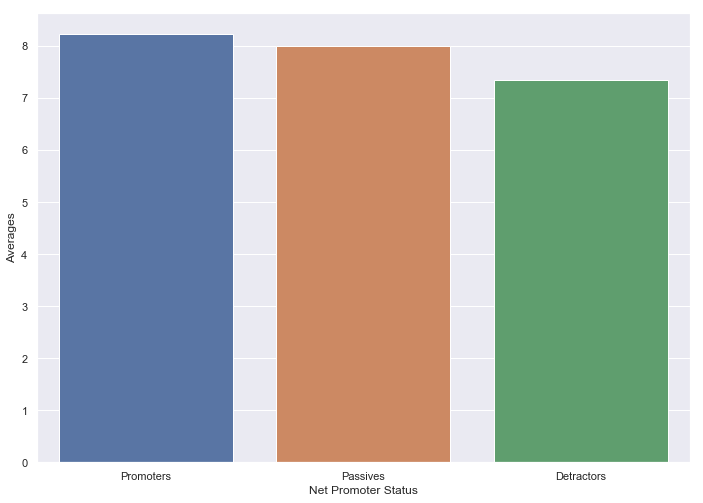

In [124]:
avgs = {'Averages': [8.225583, 8.005941, 7.349265], 'Net Promoter Status': ['Promoters', 'Passives', 'Detractors']}
avgs_df = pd.DataFrame(avgs, columns=['Averages', 'Net Promoter Status'])
sns.barplot(x='Net Promoter Status', y='Averages', data=avgs_df)

## How many promoters were from each track?

### Seaborn

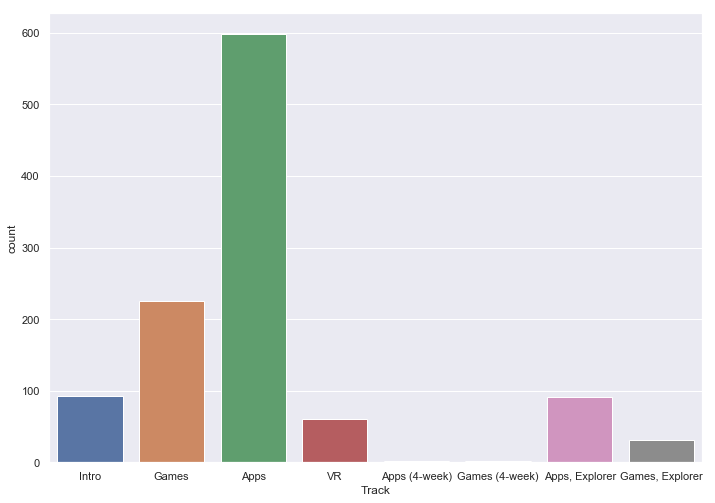

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

promo_only = ssot[(ssot['Net Promoter Status'] == 'Promoter')]
sns.countplot(x='Track', data=promo_only)

## How many detractors were from each track?

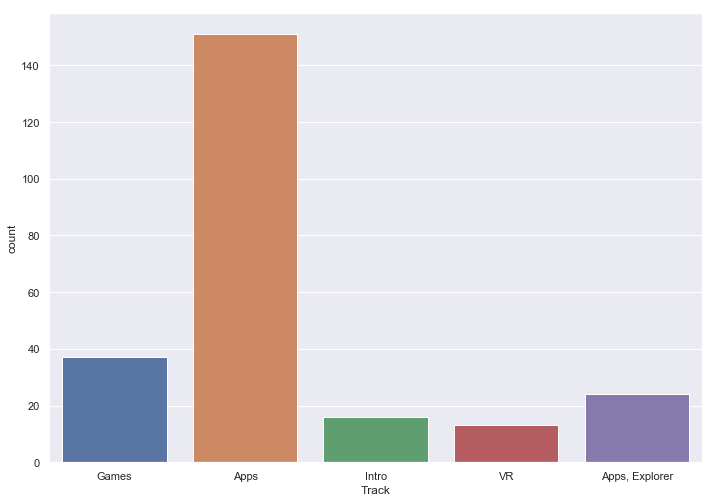

In [79]:
detract_only = ssot[(ssot['Net Promoter Status'] == 'Detractor')]
sns.countplot(x='Track', data=detract_only)

## How did Overall Satisfaction Rating change between 2016 and 2017 for individuals on the Apps track?

### 2016

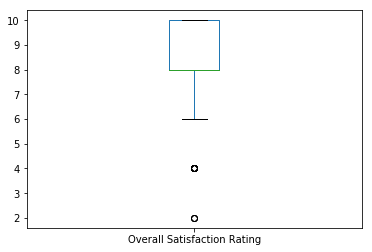

In [65]:
apps2016 = ssot[(ssot['Year']=='2016') & (ssot['Track']=='Apps')]
apps2016['Overall Satisfaction Rating'].plot.box()

### 2017

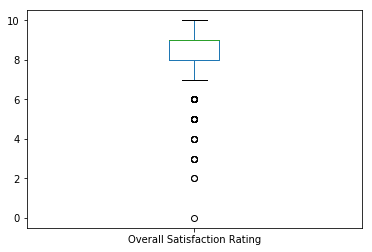

In [67]:
apps2017 = ssot[(ssot['Year']=='2017') & (ssot['Track']=='Apps')]
apps2017['Overall Satisfaction Rating'].plot.box()

### Now everyone together! lol

Year
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Overall Satisfaction Rating, dtype: object

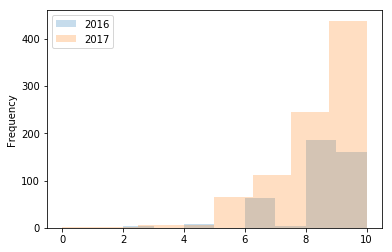

In [59]:
ssot[ssot['Track']=='Apps'].groupby('Year')['Overall Satisfaction Rating']\
.plot(bins=8, kind='hist', legend=True, alpha=0.25)

## When looking at both 2016 and 2017, what trends can we observe in Overall Satisfaction Rating from week to week?

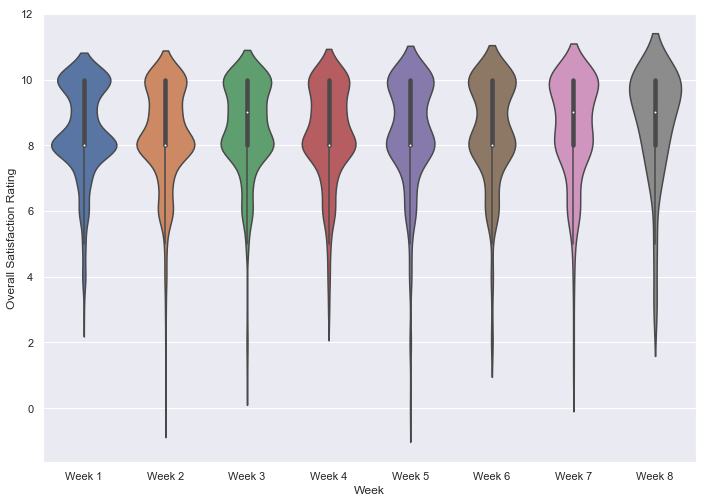

In [119]:
sns.violinplot(x="Week", y="Overall Satisfaction Rating", data=ssot)